In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('placements.csv')

In [3]:
dataset.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [4]:
dict ={"resume_score":"score"}

In [7]:
dataset.rename(columns=dict,inplace=True)

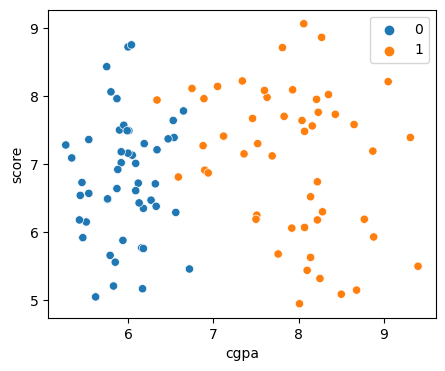

In [14]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="cgpa",y="score",data=dataset,hue="placed")
plt.legend(loc=1)
plt.show()

In [15]:
x = dataset.iloc[:,:-1]
y = dataset["placed"]

In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()

In [21]:
lr.fit(x_train,y_train)

LogisticRegression()

In [23]:
lr.score(x_test,y_test)*100

100.0

In [26]:
lr.predict([[8.27,6.45]])

C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [27]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Abhi\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


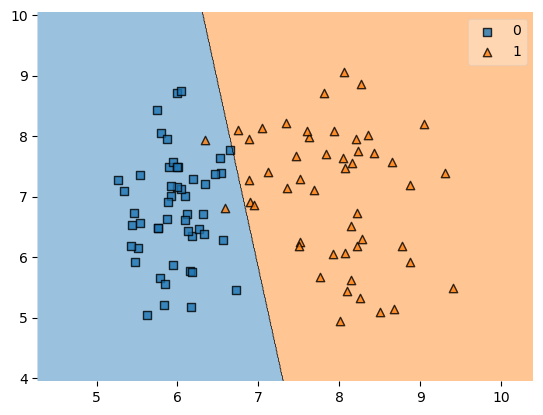

In [28]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)
plt.show()

In [29]:
lr.coef_

array([[3.0343255 , 0.49685369]])

In [30]:
lr.intercept_

array([-24.1349968])

In [31]:
import numpy as np
import pandas as pd

def generate_polynomial_dataset(num_columns=20, min_value=0.03, max_value=0.99):
    """
    Generates a polynomial dataset with the specified number of columns and value range.

    Args:
        num_columns: The number of columns in the dataset (excluding the output column).
        min_value: The minimum value for the data.
        max_value: The maximum value for the data.

    Returns:
        A pandas DataFrame containing the generated dataset.
    """

    # Generate random data for the input columns
    data = np.random.uniform(min_value, max_value, size=(100, num_columns))

    # Generate the output column based on a polynomial function of the input columns
    output = np.polyval([1, -2, 3], data[:, 0]) + np.random.normal(0, 0.1, 100)

    # Create a pandas DataFrame
    df = pd.DataFrame(data, columns=['data{}'.format(i) for i in range(1, num_columns + 1)])
    df['output'] = output

    return df

# Generate the dataset
dataset = generate_polynomial_dataset(num_columns=20)

# Print the dataset
print(dataset.head())

      data1     data2     data3     data4     data5     data6     data7  \
0  0.063228  0.680560  0.504869  0.756452  0.811254  0.329097  0.438213   
1  0.458868  0.597133  0.402121  0.944754  0.877514  0.360806  0.547873   
2  0.127561  0.263153  0.394746  0.240025  0.155443  0.503741  0.068650   
3  0.671553  0.947663  0.827376  0.288593  0.598922  0.271125  0.606616   
4  0.087845  0.906679  0.839683  0.076289  0.163796  0.944447  0.218905   

      data8     data9    data10  ...    data12    data13    data14    data15  \
0  0.373545  0.376184  0.079614  ...  0.636138  0.783267  0.624705  0.068604   
1  0.191934  0.043669  0.383789  ...  0.453043  0.710048  0.972082  0.729184   
2  0.868971  0.093399  0.836010  ...  0.548024  0.962320  0.479303  0.794227   
3  0.801282  0.914000  0.233437  ...  0.901744  0.800810  0.565684  0.607710   
4  0.077583  0.923774  0.105223  ...  0.454407  0.609675  0.845159  0.483439   

     data16    data17    data18    data19    data20    output  
0  0

In [37]:
import numpy as np

def generate_polynomial_dataset(num_samples, noise_std=0.1):
  """Generates a polynomial classification dataset.

  Args:
    num_samples: The number of samples to generate.
    noise_std: The standard deviation of the noise added to the output.

  Returns:
    A tuple of (data1, data2, output) where:
      - data1 and data2 are independent variables, each a NumPy array of shape (num_samples,)
      - output is the dependent variable, a NumPy array of shape (num_samples,)
  """

  # Generate random data for data1 and data2
  data1 = np.random.uniform(0, 1, num_samples)
  data2 = np.random.uniform(0, 1, num_samples)

  # Generate the output based on a polynomial function with added noise
  output = 0.5 * data1**2 + 0.3 * data2**3 + np.random.normal(0, noise_std, num_samples)

  # Threshold the output to create binary classification
  output = (output > 0.5).astype(int)

  return data1, data2, output

# Generate a dataset with 1000 samples
data1, data2, output = generate_polynomial_dataset(1000)

# Print the first few samples
data=np.column_stack((data1[:40], data2[:40], output[:40]))

In [38]:
df = pd.DataFrame(data, columns=['data1', 'data2', 'output'])

In [42]:
# df

In [43]:
import pandas as pd

# Load your dataset into a DataFrame
# df = pd.read_csv('df')

# Export the DataFrame to a CSV file
df.to_csv('Polynomial Classification.csv', index=False)